In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
basedir = '/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/mcs_env_cond_reviews/ecape/2020/??/01/quick/'
ds = xr.open_mfdataset(basedir + 'ecmwf-era5_oper_an_ml_2020??01????.ecape.quick.nc')


In [3]:
ds.load()

<xarray.Dataset>
Dimensions:     (time: 288, latitude: 49, longitude: 144)
Coordinates:
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-12-01T23:00:00
  * latitude    (latitude) float32 60.0 57.5 55.0 52.5 ... -55.0 -57.5 -60.0
  * longitude   (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    CAPE        (time, latitude, longitude) float64 0.09975 nan ... 4.299
    CIN         (time, latitude, longitude) float64 -8.342e-06 nan ... -17.1
    LFC         (time, latitude, longitude) float64 21.28 nan ... 917.3
    EL          (time, latitude, longitude) float64 157.4 nan ... 1.357e+03
    NCAPE       (time, latitude, longitude) float64 7.996 nan 0.0 ... 0.0 0.6674
    V_SR        (time, latitude, longitude) float64 9.269 nan ... 8.849 8.176
    Etilde      (time, latitude, longitude) float64 404.4 nan ... 8.699
    varepsilon  (time, latitude, longitude) float64 0.006409 nan ... 0.0001028
    radius      (time, latitude, longitude) float64 142.2 nan ... 1.123e+03
    ECAPE       (time, latitude, longitude) float64 40.34 nan ... 39.19 37.4
Attributes: (12/35)
    ECAPE param L_m:            120
    ECAPE param RA_filter_fac:  0.9
    ECAPE param T1:             273.15
    ECAPE param T2:             253.15
    ECAPE param alpha:          0.8
    ECAPE param sigma:          1.1
    ...                         ...
    task doc:                   None
    created on:                 2024-07-12 17:28:47.755008
    nodename:                   host568.jc.rl.ac.uk
    hostname:                   jasmin
    output path:                /gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime...
    contact:                    mark.muetzelfeldt@reading.ac.uk

In [4]:
time = pd.DatetimeIndex(ds.time)

In [5]:
from collections import Counter
Counter(time.month.values)

Counter({1: 24,
         2: 24,
         3: 24,
         4: 24,
         5: 24,
         6: 24,
         7: 24,
         8: 24,
         9: 24,
         10: 24,
         11: 24,
         12: 24})

In [6]:
dkeys = list(ds.data_vars.keys())

/tmp/ipykernel_6752/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_6752/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_6752/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_6752/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
/tmp/ipykernel_6752/3802800706.py:5: RuntimeWarning: Mean of empty slice
  im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))


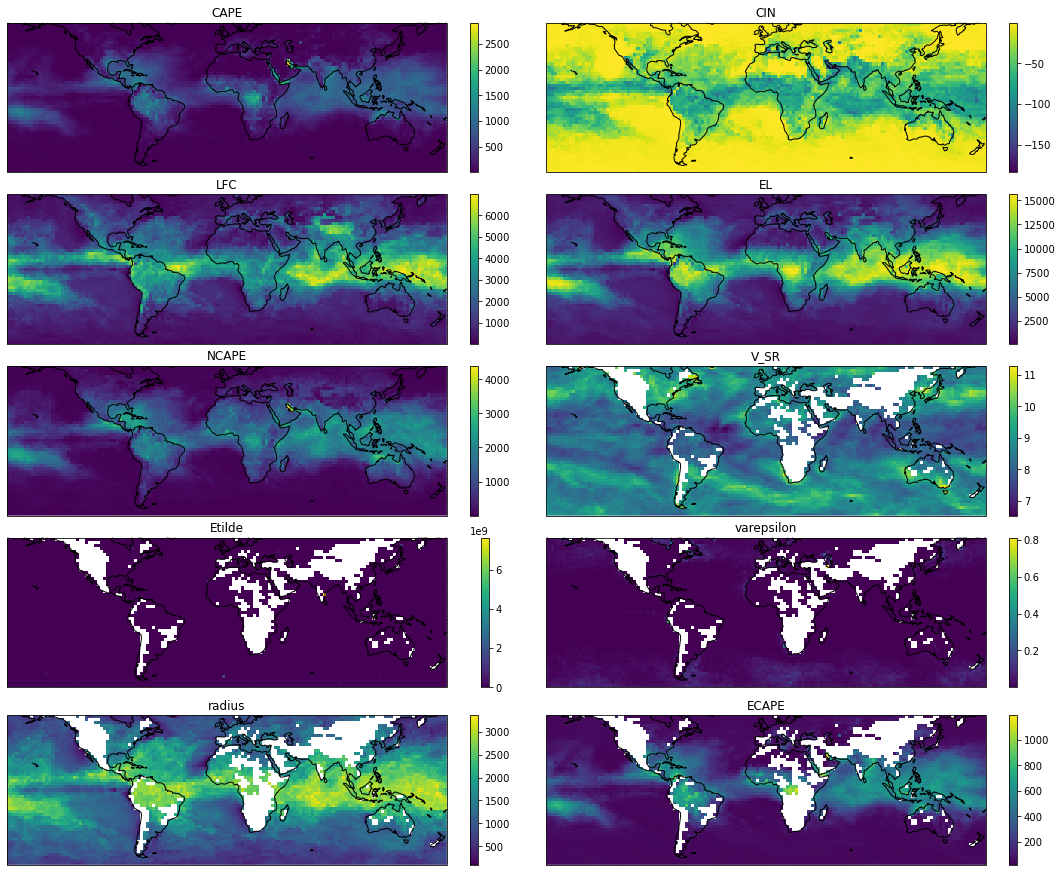

In [7]:
fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, layout='constrained', subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(15, 12)
for i, (key, ax) in enumerate(zip(dkeys, axes.flatten())):
    ax.set_title(key)
    im = ax.pcolormesh(ds.longitude, ds.latitude, np.nanmean(ds[key].values, axis=0))
    plt.colorbar(im, ax=ax)
    ax.coastlines()

In [8]:

from scipy.stats import linregress
import seaborn as sns
from matplotlib.colors import LogNorm

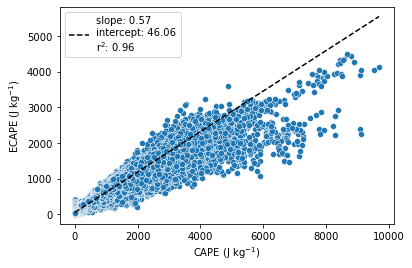

In [9]:
cape = ds.CAPE.values.flatten()
ecape = ds.ECAPE.values.flatten()
cape = cape[~np.isnan(ecape)]
ecape = ecape[~np.isnan(ecape)]

lr = linregress(cape, ecape)
sns.scatterplot(x=cape, y=ecape)
# sns.jointplot(x=df.CAPE, y=df.ECAPE, kind="hex", norm=LogNorm())
x = np.array([cape.min(), cape.max()])
y = lr.slope * x + lr.intercept
plt.plot(x, y, 'k--', label=f'slope: {lr.slope:.2f}\nintercept: {lr.intercept:.2f}\nr$^2$: {lr.rvalue**2:.2f}')
plt.xlabel('CAPE (J kg$^{-1}$)')
plt.ylabel('ECAPE (J kg$^{-1}$)')
plt.legend()
